In [1]:
# custom wip library
import easy_uid_viz as uid
import matplotlib.pyplot as plt
import seaborn as sns

Visualization setup complete. Output will be saved to ./plots


In [2]:
uid.setup(
    data_path="../UID_Analysis",  # Path to data directory 
    output_dir="./plots",         # Where to save plots
    use_tex=False,                # Use LaTeX for publication quality
    color_palette="deep",         # Color palette
    metric_ranges={               # Custom ranges for metrics
        'mean_surprisal': (0, 8),
        'uid_variance': (0, 40)
    }
)

Visualization setup complete. Output will be saved to ./plots


In [3]:
# from alex's code
import matplotlib.pyplot as plt
plt.rcParams.update({
    "font.family": "sans-serif",  # default sans-serif fonts instead
    "text.usetex": False          # disabling bc of windows weird font issue (might be env)
})

In [4]:
import matplotlib as mpl
# font fallbacks (weird windows issue)
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.serif'] = ['Times New Roman', 'DejaVu Serif', 'Liberation Serif', 
                              'Bitstream Vera Serif', 'serif']

| **Domain**          | **Metric**     | **Human** | **Instruct (FT)** | **Chat (RLHF)** | **Base-7B** | **MLE fine-tune** |
| ------------------- | -------------- | --------- | ----------------- | --------------- | ----------- | ----------------- |
| **Articles**        | mean surprisal | 4.34      | **2.90**          | 3.57            | 4.22        | 3.89              |
|                     | UID var        | 16.4      | **11.1**          | 12.6            | 14.7        | 13.5              |
|                     | UID pair       | 31.5      | **18.8**          | 23.8            | 27.1        | 23.0              |
|                     | Vocab          | —         | **316**           | 166             | 207         | 191               |
| **Writing Prompts** | mean surprisal | **5.09**  | 3.18              | 4.01            | 4.05        | 4.63              |
|                     | UID-var        | **17.6**  | 10.9              | 12.4            | 11.3        | 14.7              |
|                     | UID-pair       | **34.9**  | 19.5              | 24.4            | 21.5        | 25.3              |
|                     | Vocab          | —         | **287**           | 161             | 262         | 108               |
| **WildChat**        | μ-surprisal    | —         | **3.50**          | 3.57            | 3.73        | 4.11              |
|                     | UID-var        | —         | **14.2**          | 14.2            | 14.5        | 16.2              |
|                     | UID-pair       | —         | **24.8**          | 26.9            | 23.4        | 26.0              |
|                     |                | —         | 223               | **234**         | 221         | 161               |
| **Daily Dialog**    | μ-surprisal    | **5.36**  | 3.70              | 4.44            | 3.85        | 4.55\*            |
|                     | UID-var        | **21.7**  | 12.3              | 13.4            | 11.6        | 15.7\*            |
|                     | UID-pair       | **35.4**  | 22.0              | 26.6            | 19.9        | 26.6\*            |
|                     | Vocab          | —         | 130               | **44**          | 179         | —                 |


**Plot Types**

KDE Plot
```
uid.kdeplot(
    metric="uid_variance",
    models=["llama-2-7b-32k-instruct@q8_0", 
            "llama-2-7b-chat@q8_0"],
    domain="cnn_dailymail"
)
```
Box Plot
```
uid.boxplot(
    models=["llama-2-7b-32k-instruct@q8_0", 
            "llama-2-7b-chat@q8_0"], 
    domain="daily_dialog", xrange=(0, 100)
)
```
Violin Plot
```
uid.violinplot(
    metric="uid_pairwise",
    models=["llama-2-7b-32k-instruct@q8_0", 
            "llama-2-7b-chat@q8_0"],
    xrange=(0, 40)
)
```
Scatter Plot
```
uid.scatterplot(
    x_metric="mean_surprisal",
    y_metric="uid_variance",
    models=["llama-2-7b-32k-instruct@q8_0", 
            "llama-2-7b-chat@q8_0"],
    xrange=(0, 8),
    yrange=(0, 40)
)
```
Histogram
```
uid.histogram(
    metric="sentence_length",
    models=["llama-2-7b-32k-instruct@q8_0", 
            "llama-2-7b-chat@q8_0"],
    bins=30,
    xrange=(0, 100)
)
```
Dashboard (multiple graphs)
```
uid.dashboard(
    metrics=["mean_surprisal", "uid_variance", "uid_pairwise"],
    models=["llama-2-7b-32k-instruct@q8_0", 
            "llama-2-7b-chat@q8_0"],
    domain="daily_dialog"
)
```
Facet Grid
```
uid.facet_grid(
    metric="mean_surprisal",
    models=["llama-2-7b-32k-instruct@q8_0", 
            "llama-2-7b-chat@q8_0"],
    domains=["daily_dialog", "cnn_dailymail", "wiki"],
    plot_type="kde"
)
```
Grid Comparison
```
uid.grid_comparison(
    metrics=["mean_surprisal", "uid_variance", "uid_pairwise"],
    models=["llama-2-7b-32k-instruct@q8_0", 
            "llama-2-7b-chat@q8_0"],
    domain="reddit",
    plot_type="box"
)
```
Stat Report
```
uid.report(
    metrics=["mean_surprisal", "uid_variance", "sentence_length"],
    models=["llama-2-7b-32k-instruct@q8_0", 
            "llama-2-7b-chat@q8_0"],
    domain="wiki",
    output_file="uid_report_wiki.txt"
)
```

**List of models:**
```
llama-2-7b-32k-instruct@q8_0
llama-2-7b-chat@q8_0
llama-2-7b-dailydialog
llama-2-7b@q8_0
llama-7b-finetune-articlegen
mistral-7b-instruct-v0.1@q8_0
mistral-7b-v0.1@q8_0
mistral-plus-7b@q8_0
```

Loaded 298 samples from llama-2-7b-32k-instruct@q8_0 (cnn_dailymail)
Loaded 300 samples from llama-2-7b-chat@q8_0 (cnn_dailymail)
Loaded 297 samples from llama-7b-finetune-articlegen (cnn_dailymail)
Loaded 299 samples from human_texts (cnn_dailymail)


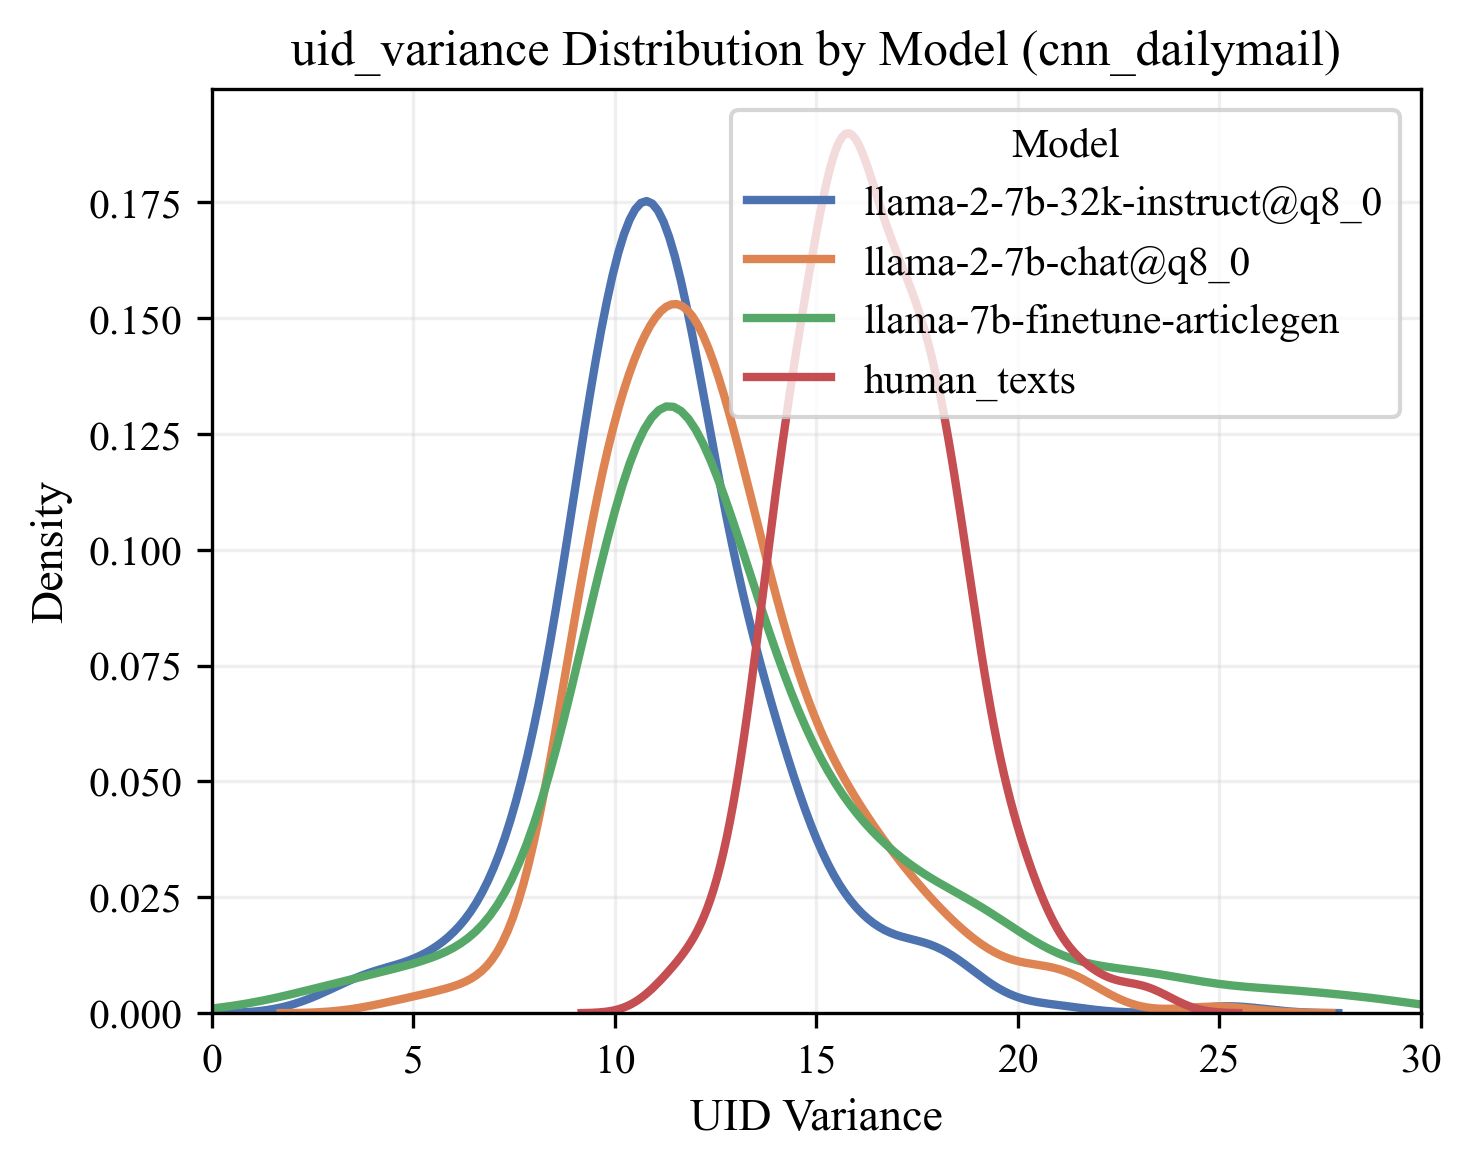

(<Figure size 1560x1200 with 1 Axes>,
 <Axes: title={'center': 'uid_variance Distribution by Model (cnn_dailymail)'}, xlabel='UID Variance', ylabel='Density'>)

In [8]:
uid.kdeplot(
    metric="uid_variance",
    models=["llama-2-7b-32k-instruct@q8_0", 
            "llama-2-7b-chat@q8_0",
            "llama-7b-finetune-articlegen",
            "human_texts"
           ],
    domain="cnn_dailymail",
    xrange=(0, 30)
)